Theta: [174.09200173   6.39554196]
Final cost: 12.405511526145363


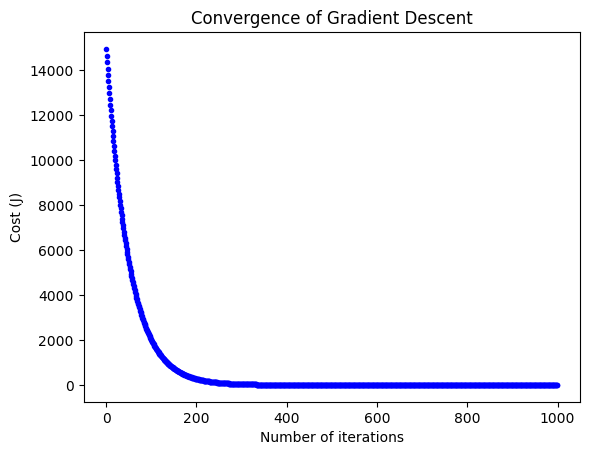

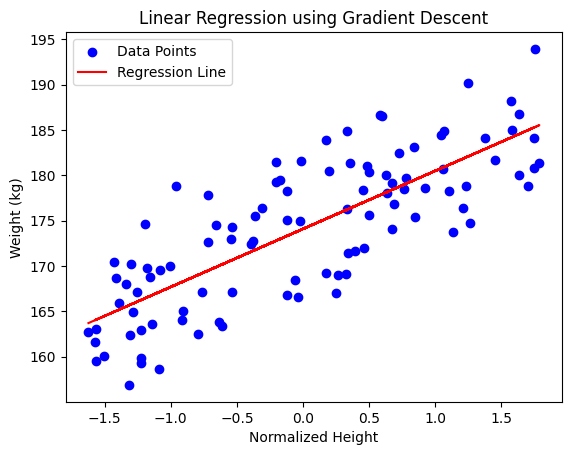

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
heights = 150 + 30 * np.random.rand(100)  # Heights in cm
weights = 50 + 0.75 * heights + 5 * np.random.randn(100)  # Weights in kg
X = heights.reshape(-1, 1)
y = weights
X = (X - np.mean(X)) / np.std(X)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1/m) * learning_rate * (X.T.dot((prediction - y)))
        cost_history[it] = compute_cost(X, y, theta)
        
    return theta, cost_history

X_b = np.c_[np.ones((X.shape[0], 1)), X]
theta = np.random.randn(2)
learning_rate = 0.01
iterations = 1000

theta, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)
print(f"Theta: {theta}")
print(f"Final cost: {cost_history[-1]}")

plt.plot(range(iterations), cost_history, 'b.')
plt.xlabel("Number of iterations")
plt.ylabel("Cost (J)")
plt.title("Convergence of Gradient Descent")
plt.show()

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, X_b.dot(theta), color='red', label='Regression Line')
plt.xlabel('Normalized Height')
plt.ylabel('Weight (kg)')
plt.title('Linear Regression using Gradient Descent')
plt.legend()
plt.show()
